In [23]:
import os,sys
import numpy as np
import pandas as pd
# import ibmseti
import collections
import scipy.io
import matplotlib.pyplot as plt
# import commonutils as cu
import PIL
from PIL import Image
import math
import timeit
import tensorflow as tf

In [24]:
import cv2
from sklearn.feature_extraction import image as patch_sk_img
from sklearn.model_selection import train_test_split

# Otsu method to remove backgroud

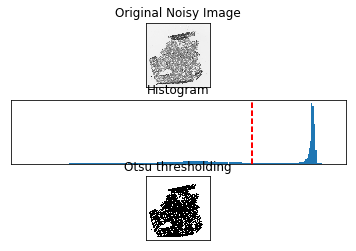

In [25]:
img = cv2.imread('TCGA-BA-4076-01A-01-TS1.b65f5830-c517-4e3e-aba2-9ec2beb5bf7f_3_0.000000_0.000000.tif',0)
 
#ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
 
#ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
blur = cv2.GaussianBlur(img, (5,5), 0)
ret, imgf = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.subplot(3,1,1), plt.imshow(img,cmap = 'gray')
plt.title('Original Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,2), plt.hist(img.ravel(), 256)
plt.axvline(x=ret, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,3), plt.imshow(imgf,cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

# Plot the patch

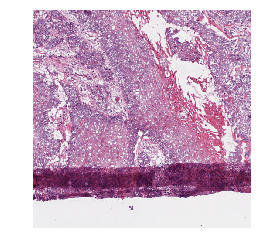

In [26]:
img = cv2.imread('TCGA-BA-4076-01A-01-TS1.b65f5830-c517-4e3e-aba2-9ec2beb5bf7f_3_0.000000_0.000000.tif')
rng = np.random.RandomState(0)
data = patch_sk_img.extract_patches_2d(img, patch_size=(500,500), max_patches=50,
                                      random_state=rng)
plt.axis("off")
plt.imshow(cv2.cvtColor(data[30], cv2.COLOR_BGR2RGB))
plt.show()

# patch return function, arg: IMG_PATH

In [27]:
def patch_return(IMG_PATH,m_p):
    rng = np.random.RandomState(0)
    img = cv2.imread(IMG_PATH)
    print img.shape
    # you can change the patch size here
    data = patch_sk_img.extract_patches_2d(img, patch_size=(500,500), max_patches=m_p,
                                      random_state=rng)
    return data

# Generate dataset x (shape:(N,height,width,channel)), y(shape:(N,))

In [28]:
x_dataset = []
y_dataset = []
max_patches = 50
# take care the folder here.
input_dir = "data"
directories = os.listdir(input_dir)

for folder in directories:
    if folder == '.ipynb_checkpoints':
        continue
    else:
        print folder
        binary_class = 0 if folder == "negative_data" else 1
        
        folder2 = os.listdir(input_dir + '/' + folder)
#         print folder2
        for image in folder2:
            if image == ".ipynb_checkpoints":
                continue
             
            print image
            IMG_PATH = input_dir+"/"+folder+"/"+image
            print IMG_PATH
            img = cv2.imread(IMG_PATH)
            print img.shape
            patch_data = patch_return(IMG_PATH,max_patches)
            for i in range(max_patches):
                x_dataset.append(patch_data[i])
                y_dataset.append(binary_class)
            print (np.array(x_dataset).shape)
y_dataset = np.array(y_dataset)

positive_data
TCGA-MZ-A5BI-01A-03-TSC.2846AF48-0EC1-45D9-BC28-FE9F86B374C2_3_555.136209_716.377941.tif
data/positive_data/TCGA-MZ-A5BI-01A-03-TSC.2846AF48-0EC1-45D9-BC28-FE9F86B374C2_3_555.136209_716.377941.tif
(4640, 7872, 3)
(4640, 7872, 3)
(50, 500, 500, 3)
TCGA-BB-4225-01A-01-TS1.0c6036d2-df98-43ea-ac5e-15e3327f85b7_3_61.557735_25.806614.tif
data/positive_data/TCGA-BB-4225-01A-01-TS1.0c6036d2-df98-43ea-ac5e-15e3327f85b7_3_61.557735_25.806614.tif
(5086, 4153, 3)
(5086, 4153, 3)
(100, 500, 500, 3)
TCGA-BB-A6UM-01A-01-TS1.186F2E58-F422-4FBE-87DB-59A95D723EA5_3_124.500000_474.000000.tif
data/positive_data/TCGA-BB-A6UM-01A-01-TS1.186F2E58-F422-4FBE-87DB-59A95D723EA5_3_124.500000_474.000000.tif
(9441, 5297, 3)
(9441, 5297, 3)
(150, 500, 500, 3)
TCGA-CN-5374-01A-01-TS1.6456dc55-6766-4e3f-b02c-d5c14154a691_1_2142.378713_1918.000000.tif
data/positive_data/TCGA-CN-5374-01A-01-TS1.6456dc55-6766-4e3f-b02c-d5c14154a691_1_2142.378713_1918.000000.tif
(7474, 4881, 3)
(7474, 4881, 3)
(200, 500, 500

In [15]:
# split the dataset, I call the test as val here
X_train, X_val, y_train, y_val = train_test_split(x_dataset, y_dataset, test_size=0.33, random_state=42)

In [16]:
# Normalize the data: subtract the mean image
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_val -= mean_image

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
# print('Test data shape: ', X_test.shape)
# print('Test labels shape: ', y_test.shape)

('Train data shape: ', (770, 500, 500, 3))
('Train labels shape: ', (770,))
('Validation data shape: ', (380, 500, 500, 3))
('Validation labels shape: ', (380,))


In [14]:
y_train.shape

NameError: name 'y_train' is not defined

In [17]:
# clear old variables
tf.reset_default_graph()

# setup input (e.g. the data that changes every batch)
# The first dim is None, and gets sets automatically based on batch size fed in
X = tf.placeholder(tf.float32, [None, 500, 500, 3])
y = tf.placeholder(tf.int64, [None])
is_training = tf.placeholder(tf.bool)

def simple_model(X,y):
    # define our weights (e.g. init_two_layer_convnet)
    
    # setup variables
    Wconv1 = tf.get_variable("Wconv1", shape=[15, 15, 3, 16])
    bconv1 = tf.get_variable("bconv1", shape=[16])
    W1 = tf.get_variable("W1", shape=[38416, 2])
    b1 = tf.get_variable("b1", shape=[2])

    # define our graph (e.g. two_layer_convnet)
    a1 = tf.nn.conv2d(X, Wconv1, strides=[1,10,10,1], padding='VALID') + bconv1
    h1 = tf.nn.relu(a1)
    h1_flat = tf.reshape(h1,[-1,38416])
    y_out = tf.matmul(h1_flat,W1) + b1
    return y_out

y_out = simple_model(X,y)

# define our loss
total_loss = tf.losses.hinge_loss(tf.one_hot(y,2),logits=y_out)
mean_loss = tf.reduce_mean(total_loss)

# define our optimizer
optimizer = tf.train.AdamOptimizer(5e-4) # select optimizer and set learning rate
train_step = optimizer.minimize(mean_loss)

Training
Iteration 0: with minibatch training loss = 7.16 and accuracy of 0
Epoch 1, Overall loss = 19 and accuracy of 0.561


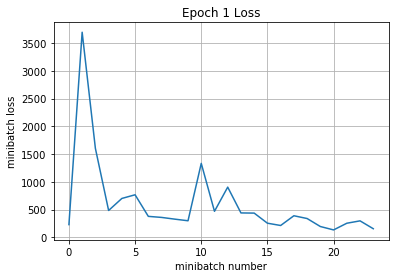

Epoch 2, Overall loss = 5.45 and accuracy of 0.705


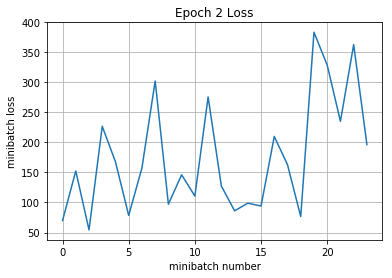

Epoch 3, Overall loss = 3.83 and accuracy of 0.694


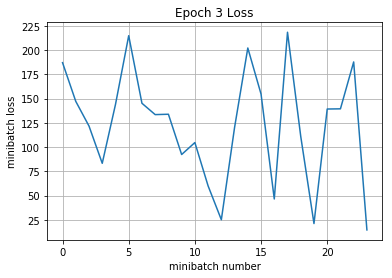

Epoch 4, Overall loss = 2.39 and accuracy of 0.778


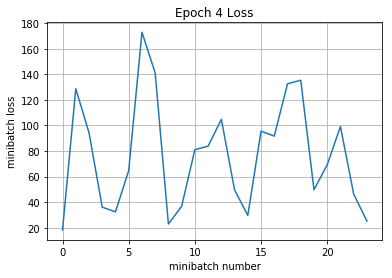

Iteration 100: with minibatch training loss = 2.57 and accuracy of 0
Epoch 5, Overall loss = 0.946 and accuracy of 0.87


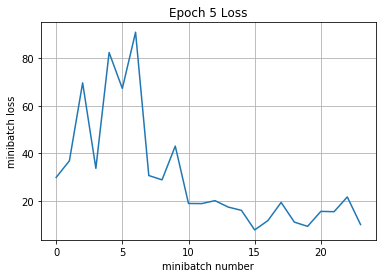

Epoch 6, Overall loss = 0.62 and accuracy of 0.884


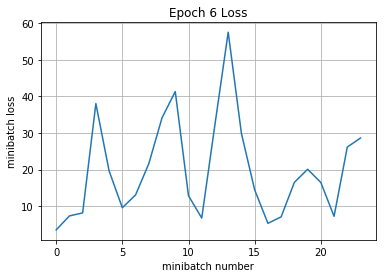

Epoch 7, Overall loss = 0.337 and accuracy of 0.892


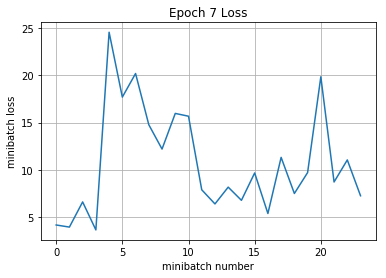

Epoch 8, Overall loss = 0.245 and accuracy of 0.899


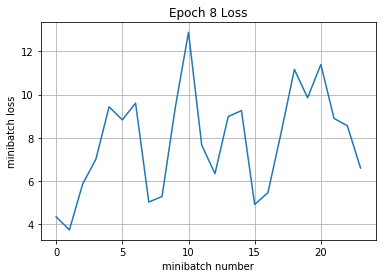

Iteration 200: with minibatch training loss = 0.146 and accuracy of 0
Epoch 9, Overall loss = 0.27 and accuracy of 0.899


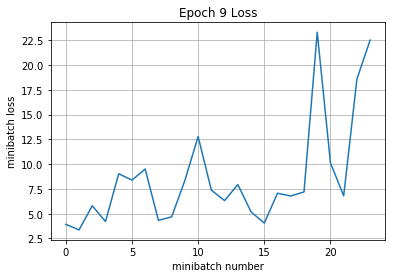

Epoch 10, Overall loss = 0.226 and accuracy of 0.913


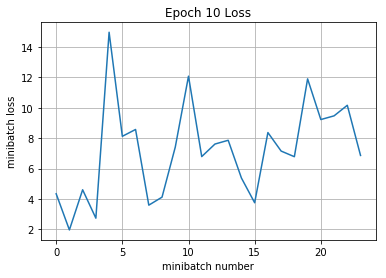

Epoch 11, Overall loss = 0.299 and accuracy of 0.894


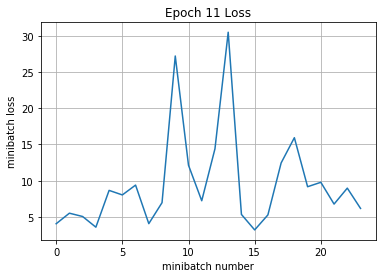

Epoch 12, Overall loss = 0.225 and accuracy of 0.901


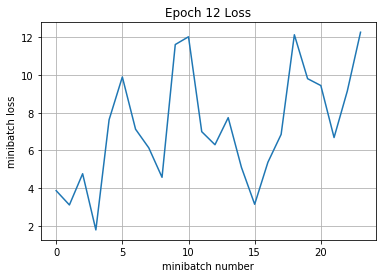

Iteration 300: with minibatch training loss = 0.196 and accuracy of 0
Epoch 13, Overall loss = 0.215 and accuracy of 0.899


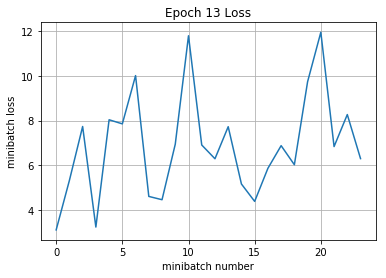

Epoch 14, Overall loss = 0.195 and accuracy of 0.913


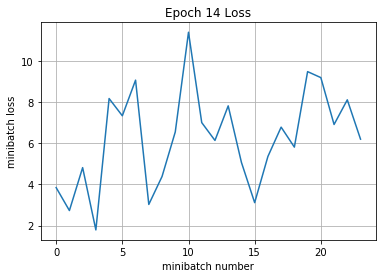

Epoch 15, Overall loss = 0.187 and accuracy of 0.913


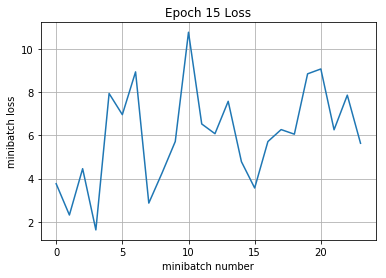

Epoch 16, Overall loss = 0.194 and accuracy of 0.912


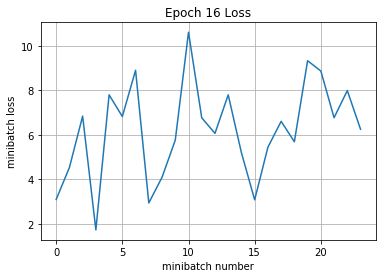

Iteration 400: with minibatch training loss = 0.162 and accuracy of 0
Epoch 17, Overall loss = 0.186 and accuracy of 0.917


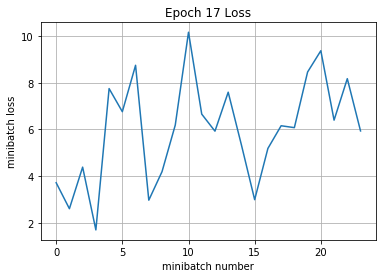

Epoch 18, Overall loss = 0.183 and accuracy of 0.917


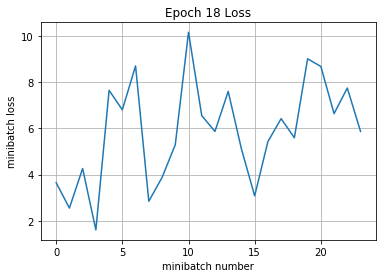

Epoch 19, Overall loss = 0.181 and accuracy of 0.925


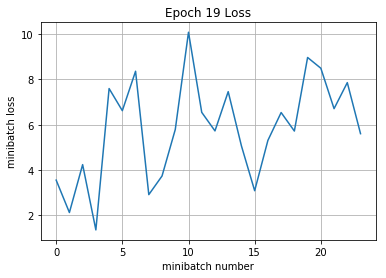

Epoch 20, Overall loss = 0.184 and accuracy of 0.914


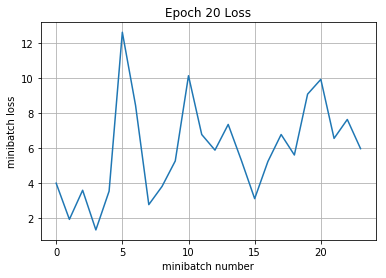

Iteration 500: with minibatch training loss = 0.7 and accuracy of 0
Epoch 21, Overall loss = 1.16 and accuracy of 0.894


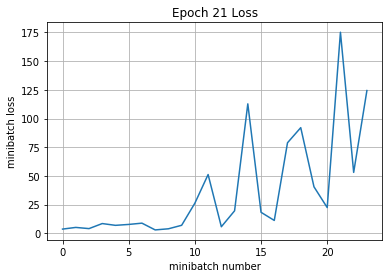

Epoch 22, Overall loss = 11.5 and accuracy of 0.797


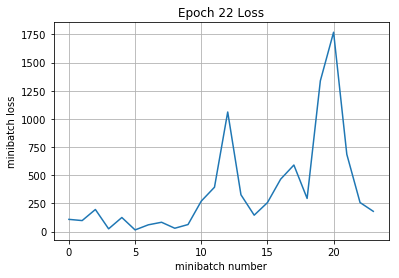

Epoch 23, Overall loss = 14.7 and accuracy of 0.795


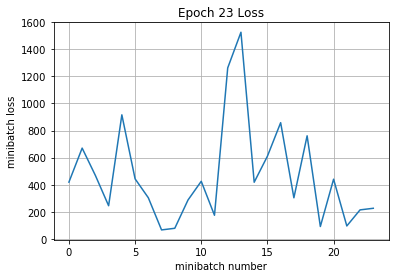

Epoch 24, Overall loss = 14 and accuracy of 0.775


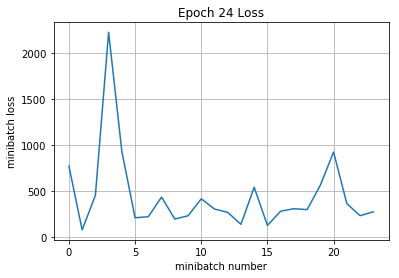

Epoch 25, Overall loss = 4.53 and accuracy of 0.862


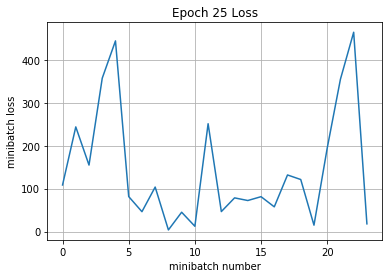

Iteration 600: with minibatch training loss = 71.3 and accuracy of 0
Epoch 26, Overall loss = 25.7 and accuracy of 0.732


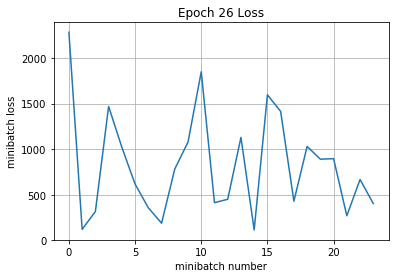

Epoch 27, Overall loss = 19.3 and accuracy of 0.777


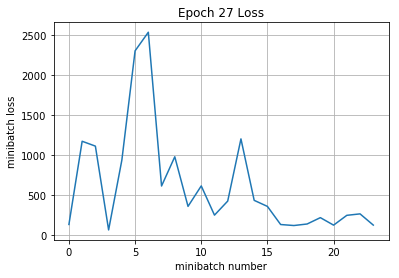

Epoch 28, Overall loss = 8.59 and accuracy of 0.881


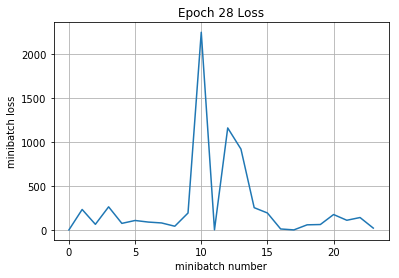

Epoch 29, Overall loss = 4.16 and accuracy of 0.881


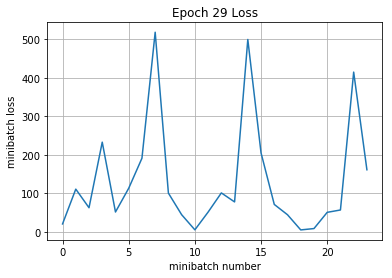

Iteration 700: with minibatch training loss = 0.255 and accuracy of 0
Epoch 30, Overall loss = 0.703 and accuracy of 0.904


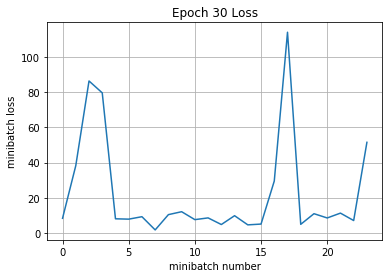

Epoch 31, Overall loss = 1.31 and accuracy of 0.892


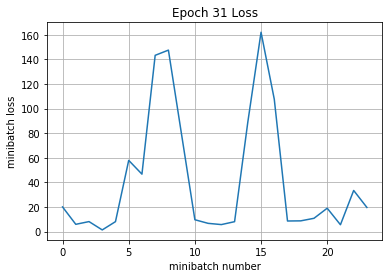

Epoch 32, Overall loss = 0.865 and accuracy of 0.909


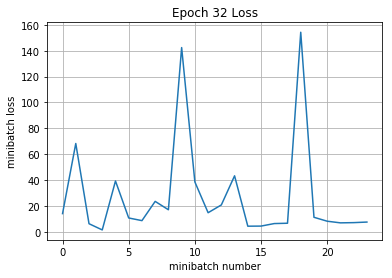

Epoch 33, Overall loss = 0.886 and accuracy of 0.917


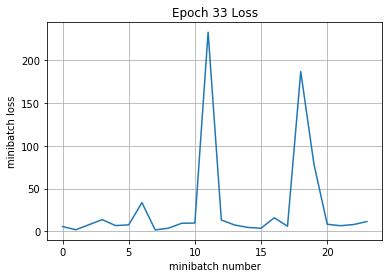

Iteration 800: with minibatch training loss = 0.0863 and accuracy of 0
Epoch 34, Overall loss = 0.87 and accuracy of 0.913


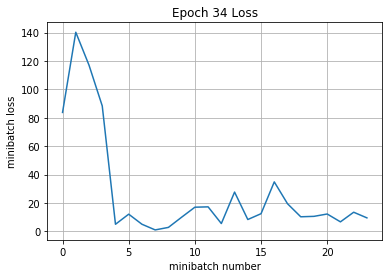

Epoch 35, Overall loss = 0.241 and accuracy of 0.914


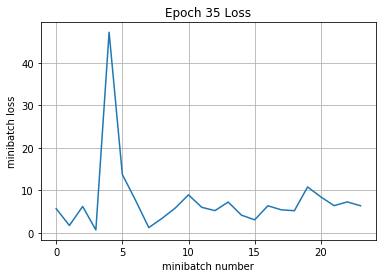

Epoch 36, Overall loss = 0.176 and accuracy of 0.918


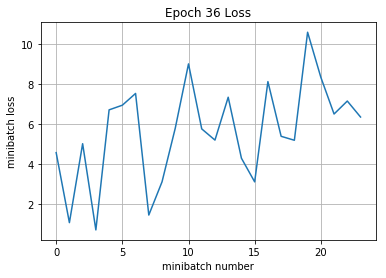

Epoch 37, Overall loss = 0.169 and accuracy of 0.919


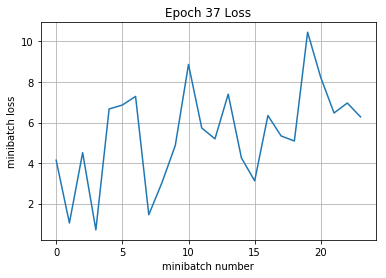

Iteration 900: with minibatch training loss = 0.163 and accuracy of 0
Epoch 38, Overall loss = 0.167 and accuracy of 0.919


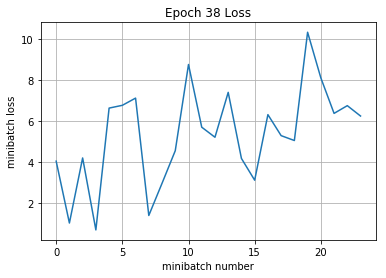

Epoch 39, Overall loss = 0.165 and accuracy of 0.922


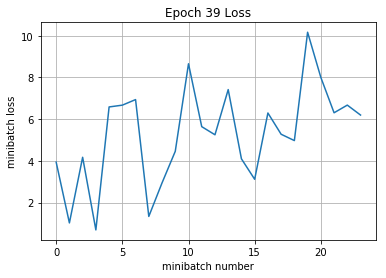

Epoch 40, Overall loss = 0.164 and accuracy of 0.921


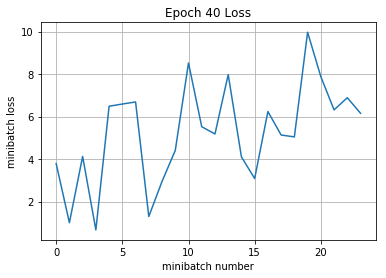

Epoch 41, Overall loss = 0.161 and accuracy of 0.926


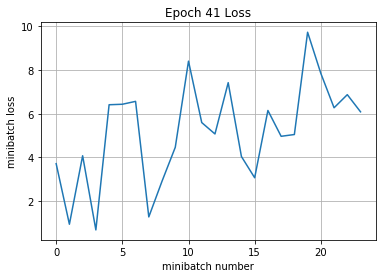

Iteration 1000: with minibatch training loss = 0.19 and accuracy of 0
Epoch 42, Overall loss = 0.159 and accuracy of 0.927


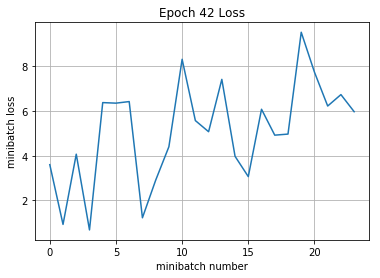

Epoch 43, Overall loss = 0.158 and accuracy of 0.927


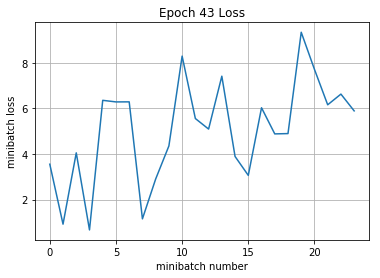

Epoch 44, Overall loss = 0.156 and accuracy of 0.927


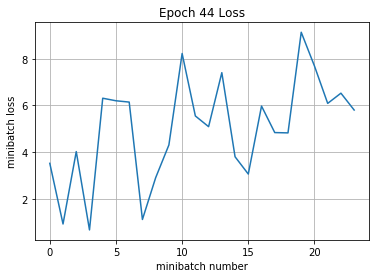

Epoch 45, Overall loss = 0.154 and accuracy of 0.929


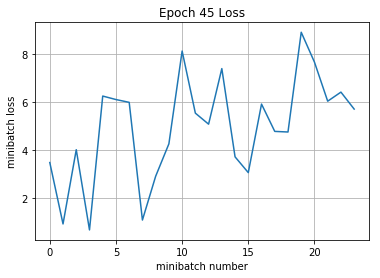

Iteration 1100: with minibatch training loss = 0.24 and accuracy of 0
Epoch 46, Overall loss = 0.153 and accuracy of 0.934


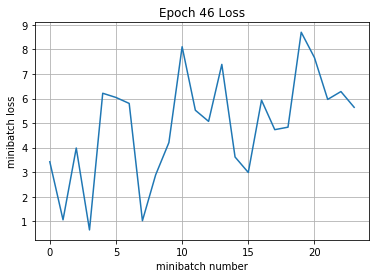

Epoch 47, Overall loss = 0.154 and accuracy of 0.935


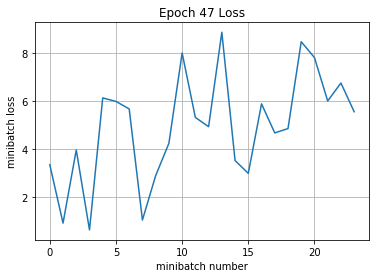

Epoch 48, Overall loss = 0.152 and accuracy of 0.935


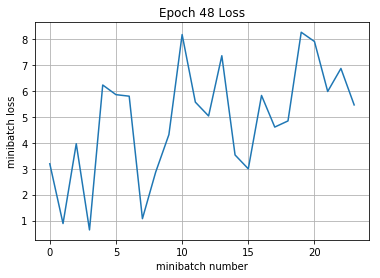

Epoch 49, Overall loss = 0.15 and accuracy of 0.938


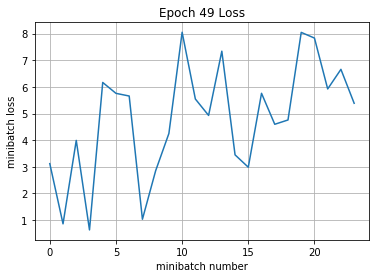

Epoch 50, Overall loss = 0.148 and accuracy of 0.943


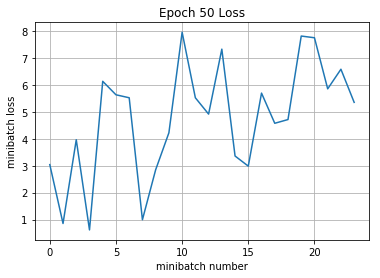

Validation
Epoch 1, Overall loss = 15.9 and accuracy of 0.634
Epoch 2, Overall loss = 15.9 and accuracy of 0.634
Epoch 3, Overall loss = 15.9 and accuracy of 0.634
Epoch 4, Overall loss = 15.9 and accuracy of 0.634
Epoch 5, Overall loss = 15.9 and accuracy of 0.634
Epoch 6, Overall loss = 15.9 and accuracy of 0.634


In [29]:
def run_model(session, predict, loss_val, Xd, yd,
              epochs=1, batch_size=64, print_every=100,
              training=None, plot_losses=False):
    # have tensorflow compute accuracy
    correct_prediction = tf.equal(tf.argmax(predict,1), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # shuffle indicies
    train_indicies = np.arange(Xd.shape[0])
    np.random.shuffle(train_indicies)

    training_now = training is not None
    
    # setting up variables we want to compute (and optimizing)
    # if we have a training function, add that to things we compute
    variables = [mean_loss,correct_prediction,accuracy]
    if training_now:
        variables[-1] = training
    
    # counter 
    iter_cnt = 0
    for e in range(epochs):
        # keep track of losses and accuracy
        correct = 0
        losses = []
        # make sure we iterate over the dataset once
        for i in range(int(math.ceil(Xd.shape[0]/batch_size))):
            # generate indicies for the batch
            start_idx = (i*batch_size)%X_train.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
            
            # create a feed dictionary for this batch
            feed_dict = {X: Xd[idx,:],
                         y: yd[idx],
                         is_training: training_now }
            # get batch size
            actual_batch_size = yd[i:i+batch_size].shape[0]
            
            # have tensorflow compute loss and correct predictions
            # and (if given) perform a training step
            loss, corr, _ = session.run(variables,feed_dict=feed_dict)
            
            # aggregate performance stats
            losses.append(loss*actual_batch_size)
            correct += np.sum(corr)
            
            # print every now and then
            if training_now and (iter_cnt % print_every) == 0:
                print("Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                      .format(iter_cnt,loss,np.sum(corr)/actual_batch_size))
            iter_cnt += 1
        total_correct = 1.0 * correct/Xd.shape[0]
        total_loss = np.sum(losses)/Xd.shape[0]
        print("Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"\
              .format(total_loss,total_correct,e+1))
        if plot_losses:
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()
    return total_loss,total_correct

with tf.Session() as sess:
    with tf.device("/cpu:0"): #"/cpu:0" or "/gpu:0" 
        sess.run(tf.global_variables_initializer())
        print('Training')
        run_model(sess,y_out,mean_loss,X_train,y_train,50,32,100,train_step,True)
        print('Validation')
        run_model(sess,y_out,mean_loss,X_val,y_val,6,32)